In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
data = 'preprocessed_id.txt'
dataGraph = nx.read_edgelist(data)
type (dataGraph)
print(nx.info(dataGraph))

Name: 
Type: Graph
Number of nodes: 1445
Number of edges: 1379
Average degree:   1.9087


In [4]:
edgeList = pd.read_csv(data, sep="\t", header=None)
edgeList.head()

,0,1
0,1289956071537172484,1046084008742801408
1,1171388755,1046084008742801408
2,548904824,589687384
3,548904824,1246657358844923904
4,779784931,255409050


In [5]:
# Define graph as G
G = nx.Graph()

In [6]:
# Add edge list into graph

for i, edge in edgeList.iterrows():
    G.add_edge(edge[0], edge[1])

C:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


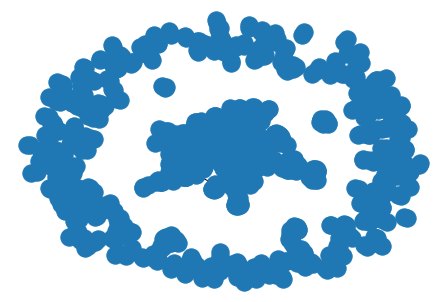

In [7]:
nx.draw(G)
plt.show()

In [8]:
def edge_to_remove(graph):
    G_dict = nx.edge_betweenness_centrality(graph)
    edge = ()

    # extract the edge with highest edge betweenness centrality score
    for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True) : 
        edge = key
        break
    return edge

In [9]:
def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg

In [10]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
    node_groups.append(list(i))

In [11]:
len(node_groups)

205

In [18]:
url_color = "https://raw.githubusercontent.com/alfhi24/color-list/main/color_list.csv"
df_color = pd.read_csv(url_color)
hex_list = list(df_color['hex'])

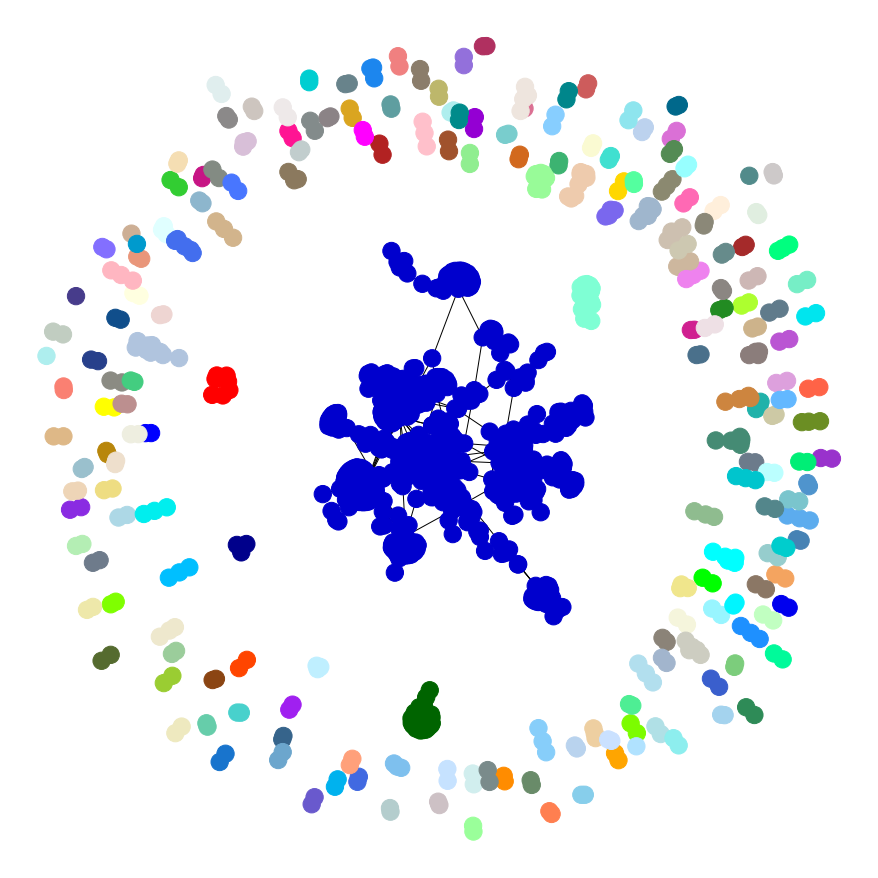

In [23]:
# plot the communities
color_map = []
i = 0
for node in G:
    for i in range(len(node_groups)) :
        if node in node_groups[i]:
            group = i
            color_map.append(hex_list[group+40])
    
plt.figure(figsize=(12,12))
nx.draw(G, node_color=color_map, with_labels=False)
plt.show()